In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Data picked up from dataset used
data = {
    "text": [
        "I feel very sad and depressed",
        "I am so stressed with work",
        "I am anxious about exams",
        "I am very happy today",
        "I feel relaxed and calm",
        "I am excited for the trip",
        "I feel hopeless and lost",
        "I am worried about my future",
        "Life is beautiful",
        "I am feeling great"
    ],
    "label": [
        "depression",
        "stress",
        "anxiety",
        "positive",
        "positive",
        "positive",
        "depression",
        "anxiety",
        "positive",
        "positive"
    ]
}

df = pd.DataFrame(data)
print(df)


                            text       label
0  I feel very sad and depressed  depression
1     I am so stressed with work      stress
2       I am anxious about exams     anxiety
3          I am very happy today    positive
4        I feel relaxed and calm    positive
5      I am excited for the trip    positive
6       I feel hopeless and lost  depression
7   I am worried about my future     anxiety
8              Life is beautiful    positive
9             I am feeling great    positive


In [4]:
# Split dataset
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [5]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)


In [7]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy*100, "%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 66.66666666666666 %

Classification Report:
               precision    recall  f1-score   support

    positive       0.67      1.00      0.80         2
      stress       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\Users\Shashwati B.U\OneDrive\Desktop\mental_health_chatbot - Copy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Shashwati B.U\OneDrive\Desktop\mental_health_chatbot - Copy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Shashwati B.U\OneDrive\Desktop\mental_health_chatbot - Copy\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

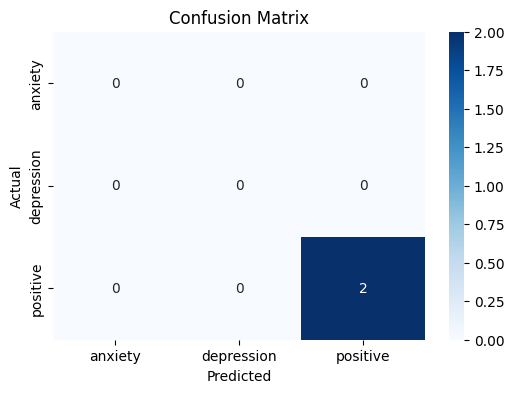

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
def mental_health_chatbot(user_input):
    vec = vectorizer.transform([user_input])
    prediction = model.predict(vec)[0]
    return prediction

# Example interaction
print(mental_health_chatbot("I feel nervous and scared"))
print(mental_health_chatbot("Life is amazing and I am happy"))


depression
positive


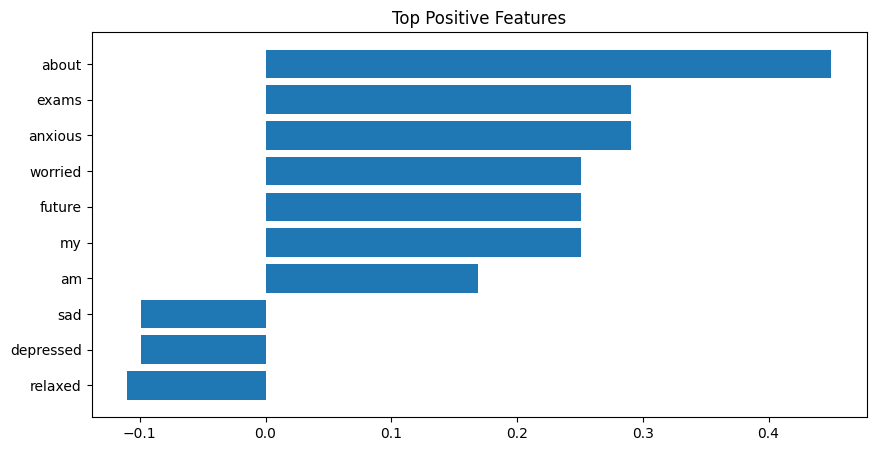

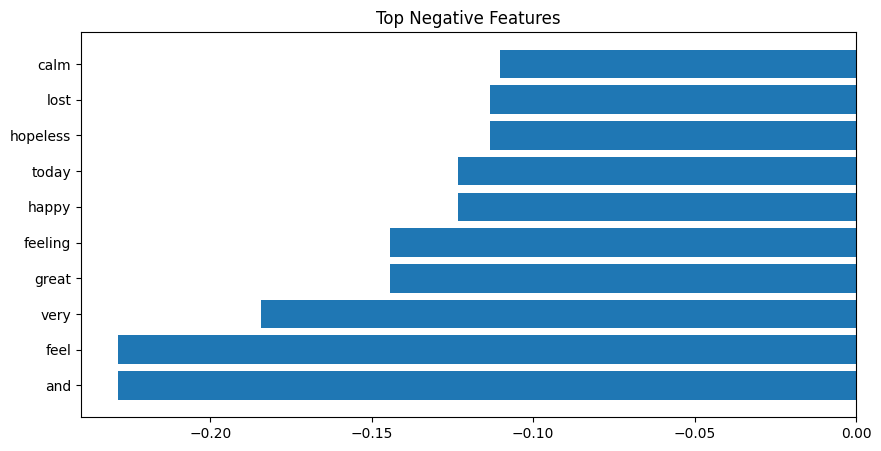

In [10]:
# Get feature importance (coefficients)
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]

top_positive_idx = np.argsort(coef)[-10:]
top_negative_idx = np.argsort(coef)[:10]

plt.figure(figsize=(10,5))
plt.barh([feature_names[i] for i in top_positive_idx], coef[top_positive_idx])
plt.title("Top Positive Features")
plt.show()

plt.figure(figsize=(10,5))
plt.barh([feature_names[i] for i in top_negative_idx], coef[top_negative_idx])
plt.title("Top Negative Features")
plt.show()
